Several years ago I was waiting for <a href=https://en.wikipedia.org/wiki/Great_Fountain_Geyser>Great Fountain Geyser</a> in Yellowstone to erupt. We ended up needing to wait several hours for the eruption (but boy was it worth it, earning Great Fountain a status as my favorite geyser in Yellowstone). 

Around 45 minutes in to the wait a group of people came to sit behind us and soon after I overheard one of them tell a riddle that kept my mind happily occupied for both the next several hours until the eruption. The riddle as I originally overheard it went something like this,

> 100 prisoners are given the following deal: Each day one of them will be selected at random and taken to a room with a single light bulb. That prisoner will be given the option to turn the light on or off and will then be asked if they are certain that all the other 100 prisoners have been in the room. If they answer yes and are correct then all the prisoners will be set free, If they are incorrect then all the prisoners will be executed.
The prisoners are allowed to discuss their strategy prior to the beginning of this process but once one of them is taken into the room all communication between the prisoners will be cut off. 
>
> What strategy should they agree upon?

<!-- END_TEASER -->


# The "Show Your Work" Version

As stated above a perfectly good strategy is to just wait N days and then say yes no matter what. It turns out that in less than 2 years all the prisoners will most likely have been in the room at least once and it is a near certainty by 5 years time. 

But this solution sort of misses the whole point of the puzzle in my opinion. The real question is how can the prisoners use the lightbulb to effectively communicate whether or not they have been in the room? A tongue in cheek modification of the riddle that eliminates this as a strategy (and removes the somewhat morally problematic 'prisoner' riddle style) might go something like this,


> 100 mathematics professors are given the following deal: Each day one of them will be selected at random and taken to a room with a single light bulb. They will be given the option to turn the light on or off and will then be asked if they can prove from their sequence of observed lightbulb states and agreed upon strategy that all the others have been in the room (assuming perfect adherence to the strategy).
>
> What strategy minimizes the expected number of days required to make a valid proof?

Being mathematicians, they of course don't need any punishment or reward associated in order to happily theorize about various possible strategies and maybe even write papers putting upper or lower bounds on the expected number of days it takes for the process to complete for various kinds of strategies. 

# A Simple Asymmetric Solution (Spoilers)

It took me quite a number of hours over several days of camping to think up a solution to this problem. But a big reason for what took me so long was that early on I had commited to the idea that I wanted every prisoner to behave in the same way as all the others. I reasoned that since the space of possible such "symmetric" strategies is much smaller than the possible set of "asymmetric" strategies in which the prisoners could be assigned special roles surely it would be easier to reason about. Furthermore, I reasoned that even if I found a good asymmetric solution in which only a single member of the group was receiving information surely that could not be the "fastest possible" strategy since that special member would be someting of an information bottle neck.

I did eventually come up with such a symmetric strategy in which all the prisoners behave in the same way as each other (which we will talk much more of later). For years this was the only solution to the riddle that I was aware of and I sort of assumed that my solution was close to as simple as possible.  But it turns out that I was wrong in thinking that the symmetric strategies would be simpler just because there were fewer of them.
 
If you haven't already thought up a solution to this riddle and would like to give it a try with this one additional hint that assigning special roles to the prisoners may be a good idea, here is your last chance to look away for a bit and give it some thought.

```








This space intentionally left blank










```


```








This space also intentionally left blank










```

```








Last Chance









```



The "easy" way to achieve certainty is to just count up to 100. You assign a single special member of the group to be the "counter" and they turn the light off if it is on. Every other member of the group turns the light on exactly once if they are brought into the room to find that it is currently off. Once the counter has turned the light off 99 times they know that everyone else must have had the opportunity to turn the light on at least once.

Tada!

## How long does it take?
 
Although this solution definitely works. How long does it take to carry out? As a quick order of magnitude estimate we just need to know around how long will it take for the counter to be selected N-1 times. Most of the time someone other than the counter will have left the light on for the counter (although once there is just one person left to count the probability will drop down to as 50%). Ignoring the chance that the counter might come in twice in a row without any other intervening candidates who can leave the light on that gives an estimate of N*(N-1) days on average. With the miss rate caused by the light failing to be turned on the real duration should be just a little over this.

This is born out by simulations

In [1]:
import numpy as np
import scipy.ndimage.filters
import random
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({
    "figure.figsize":(12, 6),
    "font.size":18,
})

In [3]:
def simulate_count_strategy(
    N_members, 
    max_days=150000,
):
    light_state = False
    count = 0
    has_turned_on = np.zeros(N_members, dtype=int)
    light_history = []
    member_history = []
    
    for i in range(max_days):
        ci = np.random.randint(N_members)
        if ci == 0: #the counter/aggregator was selected
            if light_state:
                count += 1
            light_state=False
        else:
            if (not light_state) and has_turned_on[ci] == 0:
                has_turned_on[ci] = 1
                light_state = True
                
        light_history.append(light_state)
        member_history.append(ci)
        
        if count >= N_members - 1:
            break
    
    return np.array(light_history), np.array(member_history)

In [4]:
n_days_count_strat = []
count_rates = []

for sim_index in range(1000):
    light_states, member_indexes = simulate_count_strategy(100)
    n_days_count_strat.append(len(light_states))
    #fraction of the time the counter finds the light on.
    count_rate = np.mean(light_states[np.where(member_indexes==0)[0]-1])
    count_rates.append(count_rate)

In [7]:
np.mean(n_days_count_strat)

10411.43

In [8]:
np.mean(count_rates)

0.9508361542935407

In [9]:
def calc_entropy(p):
    return -1.0*(p*np.log2(p) + (1-p)*np.log2(1-p))

In [10]:
calc_entropy(np.mean(count_rates))

0.28283436020404523

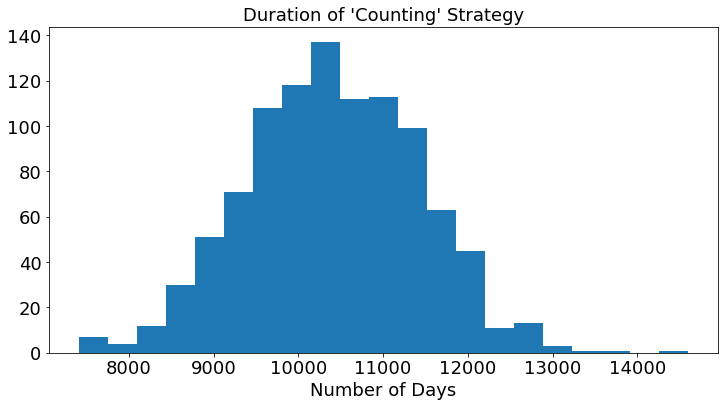

In [11]:
plt.hist(n_days_count_strat, 21);
plt.title("Duration of 'Counting' Strategy", fontsize=18);
plt.xlabel("Number of Days");

The mean number of days required by the counting strategy clocks in at just around $N^2$ which is what you would expect from the above back of the envelope calculation. 

# The Lightbulb Channel Bit Rate

Now to ask a question that is close to where I started my thought process.

What is the information theoretic limit to how much information we can pass per day using this lightbulb?

Clearly since the lightbulb itself has just 2 possible states we can use it to transmit no more than $log_2(2)=1$ bit per day. But there is an extremely odd sort of "noise" process at work here which is heavily limiting our communication ability and so the real achievable channel capacity must be somewhere below this.

The nature of the communication channel is so odd that I still can't really see any better way to reason about what the channel capacity is other than to just estimate it for particular strategies.

For the above strategy it takes around 100 days each time to transmit an "on" signal from one of the rank and file group members to the counter and it takes 99 such transmissions to count up to the required 100. If you are generous then you may suppose that each of these messages transmits one bit worth of information in which case the bit rate of the channel is around 1/100 bits per day. In reality each of these messages certainly carries less than a full bit of information since the light bulb will almost always be in the "on" state when the counter comes into the room. A more accurate estimate would be that each "on" signal transmits a number of bits close to the entropy of the probability of an "on" signal as received by the counter. In the above simulations the counter found the lights on 95% of the time which is a binary entropy of around 0.3 bits. All together that gives a channel capacity estimate of 0.003 bits/day.

That is a depressingly low capacity communication channel!

Is there perhaps a more high bandwidth way to communicate that could get us closer to the physical limitation of 1 bit/day worth of information communicated?

# "Message Passing" Type Solutions

As I mentioned above I originally was hunting for a solution in which there are no special roles for the members. In the above counting strategy we are always sending the same message "increment by 1". But what if we instead sent a different message where the meaning of the message differs by the day? The participants can agree ahead of time what an "on" signal should mean on any given day. This removes one factor of 100 from the denominator in the above bit rate calculation. Since every participant can be both a sender and a receiver of messages the chances that the message is sent and received the next day can be as high as we like (though we will not know who is receiving each message). 

What sort of logical messages could the participants send to each other such that they would be guaranteed to eventually be able to show that they had all been in the room?

Since I set the precedent above of putting a little spacer out front of the solution to the problem here it is again. If you want to take a while and think this through now is the time. One point of clarification first though, when I say that there are no special roles for the prisoners that does not mean that there isn't special information available to each prisoner, for example each prisoner knows their own assigned number. When I say that all prisoners act the same I mean they all turn the light on/off according to the same set of rules given the information available to each of them. You may well come up with a totally different solution than I did and if you do please put it in the comments for this post.


```








This space intentionally left blank










```


```








This space also intentionally left blank










```

```








Last Chance









```

## Mod N Message Passing

The solution I came up while camping in Yellowstone was this,

Leave the light on for day D if you know that participant k has been in the room and k = D mod N.

So for example suppose that we have just N=3 participants instead of 100. 

A particularly unlucky sequence would be 

1,2,3,1,2,3,1,2,3,1,2,3,...etc

Initially each participant can only know whether or not they themselves have been in the room. So until they come into the room to find the light on and therefore can expand their set of known participants they can only leave the light on when they happen to come in to the room on a day which is one less than their assigned number mod 3. Since this never happens in the above sequence the light always stays off and no information is passed around.

In contrast particularly lucky sequence of participants to send into the room would be

2,3,1,3,1

The corresponding sequences of light states would be 

* day 1 light-"off" (initial state -> no message being sent) p2 comes in and they leave the light on because tomorrow is day 2 and they know they themselves have been in the room. 
* day 2 light-"on"  p3 comes in sees the light on and now knows p2 has been in the room. They also leave the light on because tomorrow is day 3 and they know they themselves have been in the room. 
* day 3 light-"on"  p1 comes in sees the light on and now knows that p3 has been in the room. They also leave the light on because tomorrow is day 4 which is 1 mod 3 and they know they themselves have been in the room. 
* day 4 light-"on" p3 comes in sees the light on and now knows that p1 has been in the room. They leave the light on because tomorrow is day 5 and 5 is congruent to 2 mod 3. On day 2 they came into the room to see the light on and so they know that p2 has been in the room.
* day 5 light-"on" p1 comes in and sees the light on and so they now know that both 2 and 3 have been in the room because of the messages they received on day 5 and day 3 respectively. 

Participant 1 will then announce that everyone must have been in the room and everyone can go to the pub to celebrate.


# How Fast is the Mod N Solution?

When I first thought of this solution I thought it must be just about as fast as you could get. Every time the light gets left on it increases the probability that it will get left on again, and unlike any sort of asymmetric solution with different roles all 100 participants can trigger the end state of the game and so it must be faster than such asymmetric solutions right?

Using a similar sort of logic as the back of the envelope calculations up above you would suppose that you transmit initially around 1/N messages per day and it will take N such messages to be accumulated by any given participant in order to end the game which means that it will take on order $\mathcal{O}(N^2)$ days for the information to completely percolate. But the factor out front of that $N^2$ is harder to estimate than in the case of the counting solution. 

While I was camping in Yellowstone I didn't have a computer available to do any simulations and I would have guessed that the factor out front of $N^2$ would be small, perhaps 1.x or something of that nature. 

I sort of forgot about this puzzle until more than a year later when I was talking to a friend of mine who knew of this particular riddle and they told me about the counting solution I already mentioned. I was sort of surprised that I had overlooked such a simple straightforward solution in favor of the arguably much more complicated message passing solution I have described. 

But surely my more "sophisticated" symmetric role solution was faster right? 

Lets do some simulations and find out.

It is hard for me to think of a more general sort of message we may want to send other than "The sender knows that all of the participants in the set {...} have been in the room". The mod N strategy above certainly falls into this class of message. Lets offload the crafting of the messages into a function we pass into the simulation function so that we can also explore more general message passing solutions later if we like.

In [12]:
def simulate_message_strategy(
    N_members, 
    message_fn,
    max_days=150000,
):
    light_state = False
    knowledge_sets = [set() for i in range(N_members)]
    
    light_history = []
    member_history = []
    n_known_history = []
    
    implied_indexes = []
    
    for day_idx in range(max_days):
        ci = int(np.random.randint(N_members))
        c_know = knowledge_sets[ci]
        c_know.add(ci) #we know have been in the room regardless of the light state
        
        if light_state:
            #if the light was on someone has sent us a message
            #lets add it to our known set
            for idx in implied_indexes:
                c_know.add(idx)
        
        #calculate tomorrows message and see if we know enough to transmit
        implied_indexes = message_fn(day_idx+1, N_members)
        
        know_all = all([idx in c_know for idx in implied_indexes])
        light_state = know_all
                
        light_history.append(light_state)
        member_history.append(ci)
        n_known_history.append([len(kset) for kset in knowledge_sets])
        
        if len(knowledge_sets[ci]) == N_members:
            break
    
    return np.array(light_history), np.array(member_history), np.array(n_known_history)

In [13]:
def modN_message_fn(day_idx, N):
    return [day_idx % N] 

In [14]:
n_days_modn_strat = []
light_on_fractions = []

for sim_index in range(100):
    light_states, member_indexes, known_counts = simulate_message_strategy(
        100,
        message_fn=modN_message_fn,
    )
    #light_states, member_indexes = simulate_modn_strategy(100, max_days=120000)
    n_days_modn_strat.append(len(light_states))
    #fraction of the time the light is on
    light_on_fractions.append(np.mean(light_states))

In [15]:
np.mean(n_days_modn_strat)

91927.05

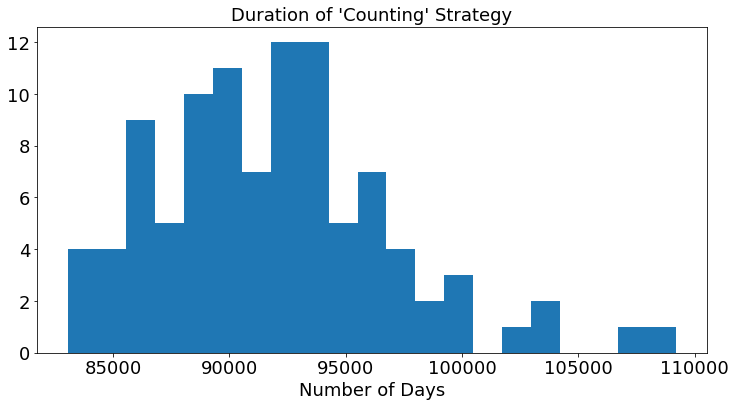

In [16]:
plt.hist(n_days_modn_strat, 21);
plt.title("Duration of 'Counting' Strategy", fontsize=18);
plt.xlabel("Number of Days");

Ooof, the "sophisticated" mod N solution is taking around 9 times as many days to execute as the simple counting strategy!

## The Lightbulb Channel Bit Rate Part 2

Lets briefly return again return to the idea of how many bits/day transmitted through the lightbulb by this strategy. The message which is transmitted on each day is received on the very next day 100% of the time so unlike in the counting strategy we don't need the inital rate of 1/N for the receiver to be selected before a transmission can occur. 

Likewise the light has been left on almost 50% of the time which is close to the theoretical maximum entropy switching rate of 1/2 and so using the same naive entropy estimate as we did earlier we get a bit rate estimate which is close to the physical maximum of 1 bit per day!


In [17]:
np.mean(light_on_fractions)

0.43936372435689397

In [18]:
calc_entropy(np.mean(light_on_fractions))

0.9893649607680294

There are a couple things going on here. 

Firstly we actually are trying to transmit more information than in the counting strategy. In the counting strategy we don't try to say which of the participants have been in the room but only that at least one more has been which means our counting system can only be in 1 of 100 states and so we really only need to communicate $log_2(100)~6.6$ bits. But in the mod N strategy we communicate which of the particular prisoners have been in the room which is a message space which spans 100 bits (one for each participant). 

Secondly although every day a message is delivered to a valid receiver, since we have 100 receivers the information contained in those messages is also divided up 100 different ways.

But even if we need to transmit 100 bits of information to all 100 particpants. If our communication bit rate is close to 1 per day then shouldn't we achieve a proof after something fairly close to 10,000 days instead of nearly 100,000 days like the simulations seem to suggest?

Well the same naive entropy estimate as we used for the counting strategy won't fly here. Saying that the light is on 50% of the time is a little misleading. It is true that the light is on roughly 50% of the time but saying that it is unpredictably transitioning from off to on from the perspective of the receiver is a stretch.

It starts being off almost all the time and then ends up being on nearly all the time. At the beginning the entropy of the light state is very low because the messages aren't really being passed and later on the information contained in the messages being passed is known to almost all the particpants and so isn't really informative. Information is only really being efficiently passed around for the days near the middle of the process.

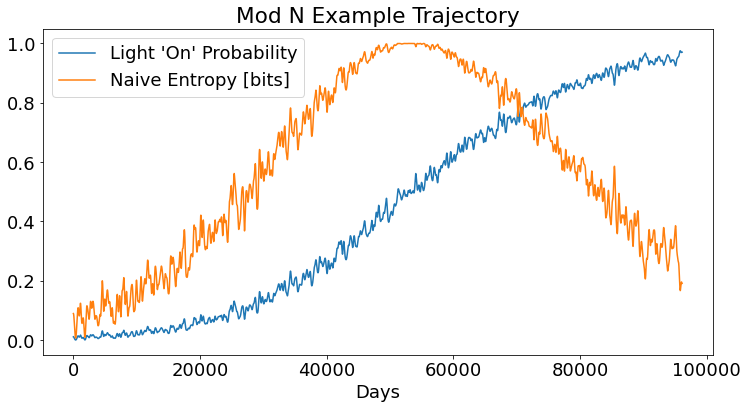

In [19]:
on_prob = scipy.ndimage.filters.gaussian_filter(light_states.astype(float), 100)
plt.plot(on_prob, label="Light 'On' Probability")
plt.plot(calc_entropy(on_prob), label="Naive Entropy [bits]")

plt.legend()
plt.title("Mod N Example Trajectory")
plt.xlabel("Days");

# A Better Set of Messages?

The slow ramp up of the amount of information being transmitted early on is a function of the fact that the participants themselves have very little information available to them which seems difficult to change. 

But the low information/entropy of the late stages of the process are because each message stops being surprising to the receiver. The chances become very high that the light is being left on precisely because the participants all already have most of the other participants in their known sets and so the message start to lose their informativeness. 

By ramping up the size of the known set being indicated by the later messages we can decrease the likelihood that a random participant has access to that information. This decreases the likelihood that the message will be able to be sent but also greatly increases the chance that the receiver gets some new information out of it.

Instead of coming up with a schedule which sends all possible sets of singlets, then pairs, then triplets etc. It is much easier to just generate a pseudorandom sequence of messages and just enforce that sequence to be the same between all participants. Because of the way that the simulation function is coded we don't even need the message function to be deterministic since it reuses whatever was returned by the previous day for the next day's message passing. This works well enough for our simulation purposes though obviously in practice the messages would need to be frozen ahead of time. 

I picked some arbitrary thresholds which seem to do well for a set of 100 participants. Note that it is also important that we continue to include the possibility of transmitting singlet messages since if we do not then we can become very unlucky and miss the initial sharing of any 1 particular singlet. If for example the first participant is never selected on a day corresponding to sending the singlet message for themselves and we then transition to sending only double participant messages then we will have locked ourselves in to a no win situation.

In [20]:
def progressive_messages(day_idx, N):
    max_tuplet_size = 1
    if day_idx > 5*N**2:
        max_tuplet_size = 2
    if day_idx > 6*N**2:
        max_tuplet_size = 4
    if day_idx > 6.5*N**2:
        max_tuplet_size = 7
    if day_idx > 6.8*N**2:
        max_tuplet_size = 10
    tuplet_size = np.random.randint(1, max_tuplet_size+1)
    return [int(i) for i in np.unique(np.random.randint(N, size=(tuplet_size,)))]

In [21]:
res = simulate_message_strategy(
    100,
    message_fn=progressive_messages,
)
print(len(res[0]))

68240


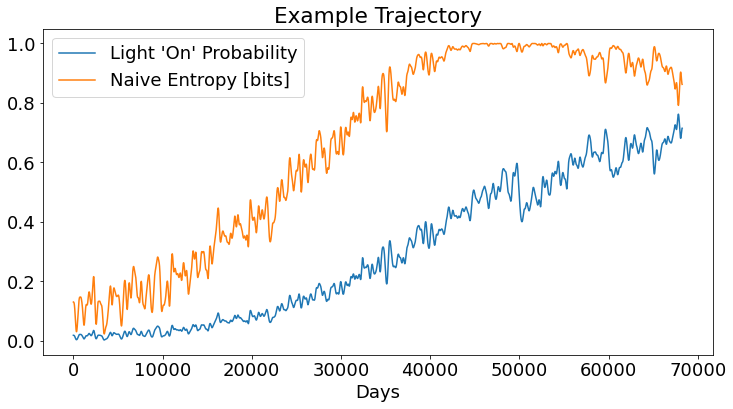

In [22]:
on_prob = scipy.ndimage.filters.gaussian_filter(res[0].astype(float), 100)
plt.plot(on_prob, label="Light 'On' Probability")
plt.plot(calc_entropy(on_prob), label="Naive Entropy [bits]")

plt.legend()
plt.title("Example Trajectory")
plt.xlabel("Days");

As you can see you can see by periodically increasing the size of the typical known set required to send the messages we can easily keep the message entropy high almost to the end of the process and shorten the number of days required. 

But we can't really apply this same strategy to try and cut down on the length of the initial ramp up period where we are stuck sending singlet messages till the participants become more generally well informed.

# Count Passing?

There is a huge gap between the average time for each participant to have been chosen at least once which is roughly proportional to $N$ days and the fastest detection of that fact after roughly $N^2$ days. Even though the message passing strategies up above performed much worse than the counting strategy perhaps we can learn something from it in order to come up with another faster strategy.

The counting strategy is faster in no small part because it is trying to communicate something fundamentally much simpler, a lower bound on a count of those chosen, as opposed to the exact identity of those chosen. The disadvantage of needing to communicate so much more information completely overwhelms the advantage in terms of the efficiency of transmission.

Instead of making most of the participants turn the light on only once what if everyone kept a running sum of the incoming count messages they have received and the outgoing messages they have sent? This amounts to the same thing as simply turning the light on once and then leaving it alone if every day the light indicates the same number of upstream counts but what if we copy the message passing strategy and change the size of the increments depending on the day? 
I have a suspicion that such a strategy could be used to beat the simple counting strategy somehow but I haven't been able to quite manage it yet. I may come back to this post and make tweaks in the future but I think I have spent quite enough time thinking about this riddle. I will leave my most recent attempt code here just in case.


In [23]:
class RampCountFn(object):
    
    def __init__(self, ramp_lengths):
        self.ramp_lengths = ramp_lengths
        schedule = []
        for ramp_n in ramp_lengths:
            schedule.extend(range(1, ramp_n+1))
        self.schedule = schedule
        
    def __call__(self, day_idx):
        if day_idx >= len(self.schedule):
            return 1
        else:
            return self.schedule[day_idx]

In [24]:
rfn = RampCountFn(np.repeat(range(10, 2, -1), 100))
#plt.plot([rfn(i) for i in range(1000)])

In [25]:
def simulate_count_passing_strategy(
    N_members, 
    n_transfer_fn,
    max_days=150000,
):
    light_state = False
    current_counts = np.ones(N_members, dtype=int)
    
    light_history = []
    member_history = []
    
    carry_amt = 0
    
    for day_idx in range(max_days):
        ci = np.random.randint(N_members)
        if light_state:
            current_counts[ci] += carry_amt 

        available = current_counts[ci]
        
        if available >= N_members:
            break
        
        carry_amt = n_transfer_fn(day_idx)
        
        light_state = False
        if available >= carry_amt:
            #transfer_prob = 0.5*carry_amt/available
            transfer_prob = 1.0
            if ci == 0:
                transfer_prob = 0.0
            leaves_light_on = np.random.random() < transfer_prob
            if leaves_light_on:
                light_state = leaves_light_on
                current_counts[ci] -= carry_amt
        
        light_history.append(light_state)
        member_history.append(ci)
    
    return np.array(light_history), np.array(member_history), current_counts

In [26]:
res = simulate_count_passing_strategy(
    N_members=100, 
    n_transfer_fn=rfn,
    max_days=100000,
)

In [27]:
len(res[0])

12783

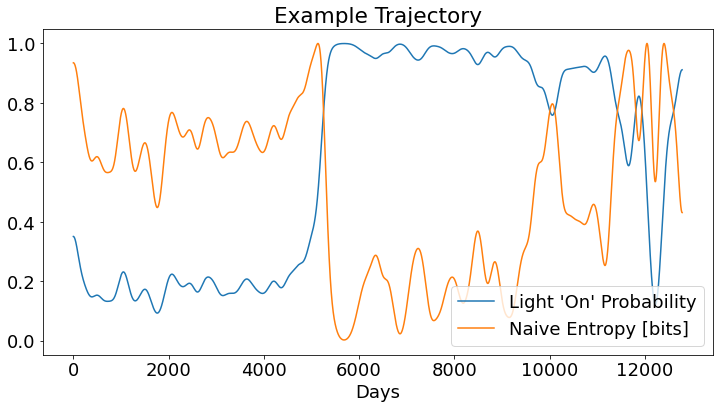

In [28]:
on_prob = scipy.ndimage.filters.gaussian_filter(res[0].astype(float), 100)
plt.plot(on_prob, label="Light 'On' Probability")
plt.plot(calc_entropy(on_prob), label="Naive Entropy [bits]")

plt.legend(loc=4)
plt.title("Example Trajectory")
plt.xlabel("Days");

# 

In [373]:
def simulate_switched_count_passing(
    N_members,
    count_schedule,
    #keep_probs,
    accumulator_index=0,
    max_days=100000,
):
    light_history = []
    amt_history = []
    count_history = []
    
    light_state = False
    prev_day_amt = 0
    
    current_counts = np.ones(N_members, dtype=int) #start everyone off with 1 count to give
    
    accumulator_index = None
    
    for day_idx in range(max_days):
        count_history.append(current_counts.copy())
        
        ci = np.random.randint(N_members)
        start_amt = current_counts[ci]
        cur_day_amt = count_schedule[day_idx % len(count_schedule)]
        
        #cur_keep_prob = keep_probs[min(len(keep_probs)-1, day_idx), start_amt]
        #is_sticky = np.random.random() < cur_keep_prob

        #target_lumpyness = target_schedule[day_idx % len(target_schedule)]        
        #prior to aggregating any passed counts determine if we are going to pass forward if we can
        #is_sticky = current_counts[ci] > target_lumpyness
        #print("cur day amt", cur_day_amt)
        
        is_sticky = ci == accumulator_index 
        
        if light_state:
            #we got passed some aggregated counts!
            current_counts[ci] += prev_day_amt #add them into our total
            light_state = False #and turn off the light temporarily
                
        #print(current_counts[ci], cur_day_amt, target_lumpyness)
        
        #print("our amount", current_counts[ci])
        
        #check if our count total is enough to declare 
        if current_counts[ci] >= N_members:
            break #We did it!
        
        if current_counts[ci] >= cur_day_amt:
            #print("have enough to pass message")
            #we have enough aggregated counts to leave the light on
            if is_sticky:
                #print("Not going to pass!")
                #we are above the target "lumpyness" threshold hold on to our counts
                light_state = False
            else:
                #print("passing!")
                #we are below the lumpyness target lets go ahead and pass the love
                light_state = True
                current_counts[ci] -= cur_day_amt #store the count amount in the light state
        else:
            pass
            #print("don't have enough to pass a message")
        
        prev_day_amt = cur_day_amt
        
        if light_state:
            amt_history.append(cur_day_amt)
        else:
            amt_history.append(0)
        
        light_history.append(light_state)
        
    return np.array(light_history), np.array(count_history), np.array(amt_history)

In [372]:
aggregator_counts = np.zeros((5000, 100))
second_to_max_counts = np.zeros((1000, 100))

In [360]:
count_schedule = np.hstack([
    np.tile(np.arange(1, 31), 4), 
    np.tile(np.hstack([np.arange(1, 8), np.repeat(7, 100)]), 10),
    np.tile(np.hstack([np.arange(1, 6), np.repeat(5, 100)]), 10),
    np.tile(np.hstack([np.arange(1, 4), np.repeat(3, 100)]), 10),
    np.tile(np.hstack([np.repeat(1, 10), np.arange(1, 3), np.repeat(2, 100)]), 100),    
    #np.tile(np.arange(1, 5), 10), 
    #np.ones(10000, dtype=int),
])

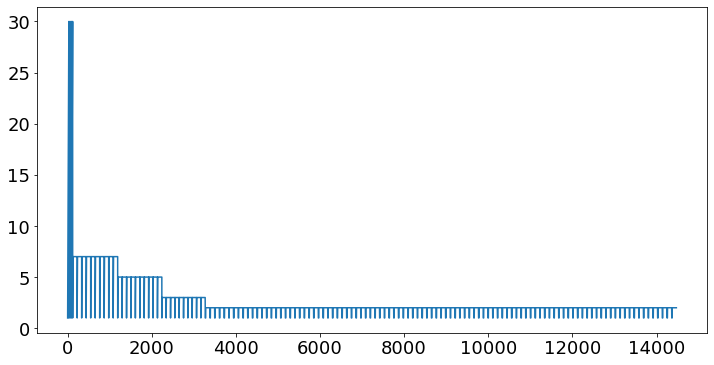

In [361]:
plt.plot(count_schedule)

In [362]:
np.bincount(cnts[1000])

array([37, 51,  4,  3,  3,  0,  1,  0,  0,  0,  1])

In [371]:
keep_probs[1000][27]

0.6860213681045484

In [364]:
lengths = []

In [365]:
for i in range(101):
    print(".", end="")
    
    #keep_probs = unique_max_counts/(0.0001 + np.sum(unique_max_counts, axis=1, keepdims=True))
    
    keep_probs = np.cumsum(unique_max_counts, axis=1)
    keep_probs /= (keep_probs[:, [-1]] + 0.0000001)
    keep_probs = np.clip(keep_probs-0.5, 0, 1.0)
    keep_probs /= (keep_probs[:, [-1]] + 0.0000001)

    light_states, cnts, pamts = simulate_switched_count_passing(
        N_members=100,
        max_days=20000,
        count_schedule = count_schedule,
        keep_probs = keep_probs,#np.repeat(0.3, 100).reshape((1, -1))
    )
    short_counts = cnts[:5000]
    maximum_vals = np.max(short_counts, axis=1, keepdims=True)
    n_maxima = np.sum(short_counts == maximum_vals, axis=1)
    
    #forced_unique_max = #maximum_vals.reshape((-1,))+np.where(n_maxima > 1, 1, 0)
    for day, (val, degeneracy) in enumerate(zip(maximum_vals, n_maxima)):
        if degeneracy == 1: 
            unique_max_counts[day, val] += 1
    
    lengths.append(len(light_states))

.....................................................................................................

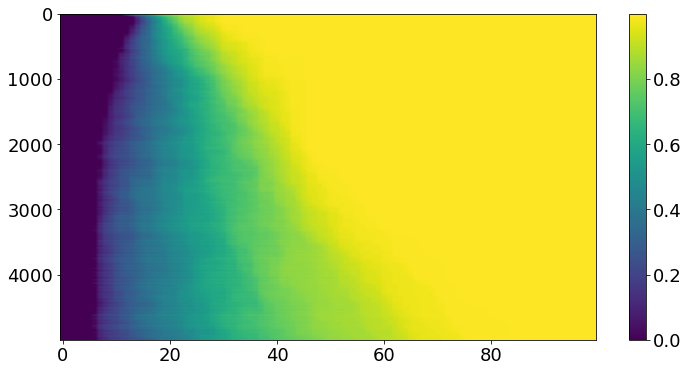

In [366]:
plt.imshow(keep_probs, aspect="auto")
plt.colorbar()

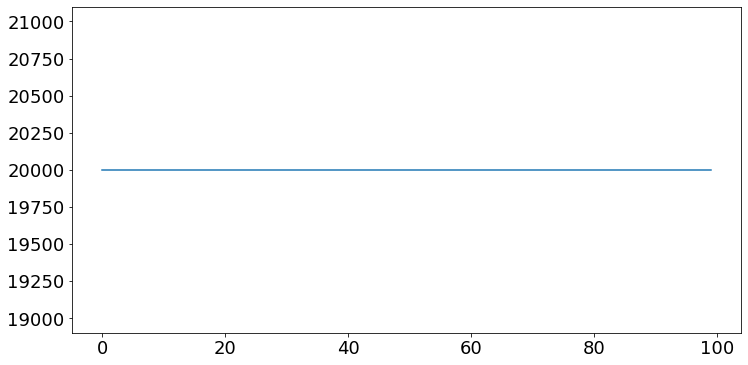

In [367]:
plt.plot(lengths[-100:])

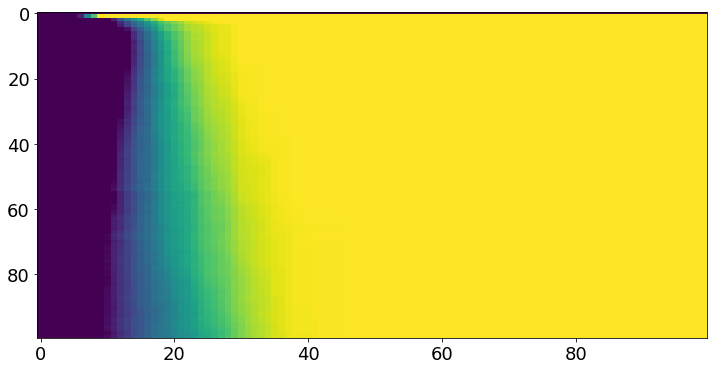

In [368]:
plt.imshow(keep_probs[:1000:10], aspect="auto")

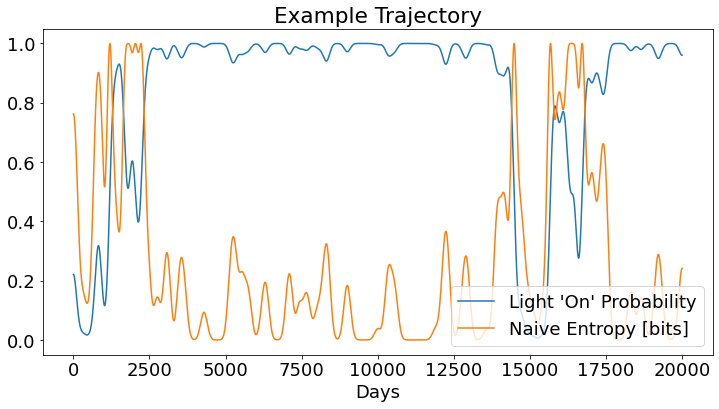

In [369]:
on_prob = scipy.ndimage.filters.gaussian_filter(np.asarray(light_states).astype(float), 100)
plt.plot(on_prob, label="Light 'On' Probability")
plt.plot(calc_entropy(on_prob), label="Naive Entropy [bits]")

plt.legend(loc=4)
plt.title("Example Trajectory")
plt.xlabel("Days");

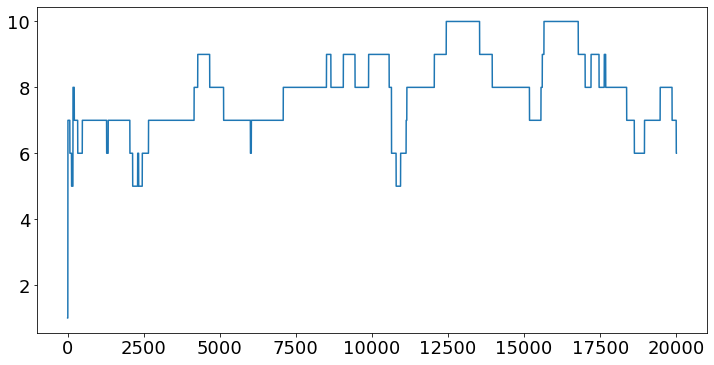

In [182]:
plt.plot(np.max(cnts, axis=1))

In [173]:
cnts

[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 

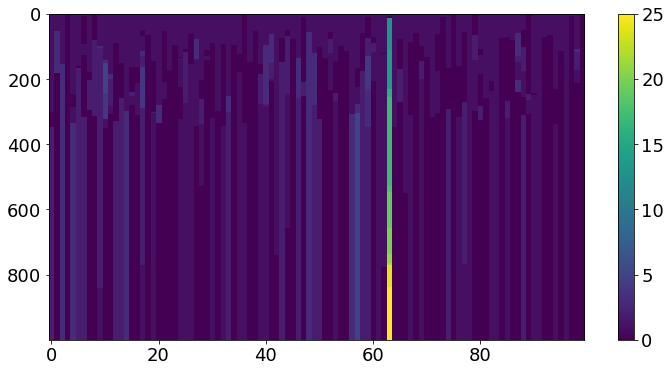

In [165]:
plt.imshow(np.array(cnts[:1000]), aspect="auto", interpolation="nearest")
plt.colorbar()

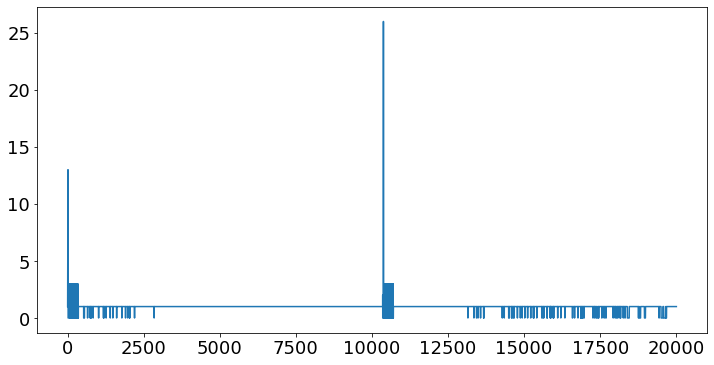

In [161]:
plt.plot(pamts)

In [163]:
np.max(cnts)

93

In [164]:
len(cnts)

20000

In [133]:
np.bincount(cnts[100])

array([34, 49, 11,  4,  1,  0,  0,  0,  0,  0,  0,  0,  1])

In [71]:
cnts[2]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [63]:
np.bincount(cnts[-1])

array([ 1, 99])

In [ ]:
def simulate_
light_state = False
    current_counts = np.ones(N_members, dtype=int)
    
    light_history = []
    member_history = []
    
    carry_amt = 0
    
    for day_idx in range(max_days):
        ci = np.random.randint(N_members)
        if light_state:
            current_counts[ci] += carry_amt 

        available = current_counts[ci]
        
        if available >= N_members:
            break
        
        carry_amt = n_transfer_fn(day_idx)
        
        light_state = False
        if available >= carry_amt:
            #transfer_prob = 0.5*carry_amt/available
            transfer_prob = 1.0
            if ci == 0:
                transfer_prob = 0.0
            leaves_light_on = np.random.random() < transfer_prob
            if leaves_light_on:
                light_state = leaves_light_on
                current_counts[ci] -= carry_amt
        
        light_history.append(light_state)
        member_history.append(ci)
    
    return np.array(light_history), np.array(member_history), current_counts